# K Nearest Neighbors with Python - Classified Data

This data set has completely random columns with no context to anything.

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## Get the data

In [14]:
df=pd.read_csv("Classified Data",index_col=0)

In [15]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler=StandardScaler()# to normalize the data so that the mean = 0 and the std deviation = 1

In [27]:
scaler.fit(df.drop('TARGET CLASS',axis=1))#Compute the mean and std to be used for later scaling.

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))#Perform standardization by centering and scaling

In [32]:
scaled_features#returns numpy array

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [40]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])#creating a dataframe of the scaled columns

In [42]:
X=df_feat
y=df['TARGET CLASS']

## Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Creating KNN Model

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn=KNeighborsClassifier(n_neighbors=1)

In [48]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## Predictions and Evaluations

In [50]:
pred=knn.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[151   8]
 [ 15 126]]


In [57]:
(pred!=y_test).value_counts()

False    277
True      23
Name: TARGET CLASS, dtype: int64

In [58]:
23/300

0.07666666666666666

In [59]:
np.mean(pred!=y_test)# the error rate of the values that satisfy the condition (True)

0.07666666666666666

## Choosing a K value


**Using the elbow method, We'll create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.**

In [60]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))

Text(0, 0.5, 'Error Rate')

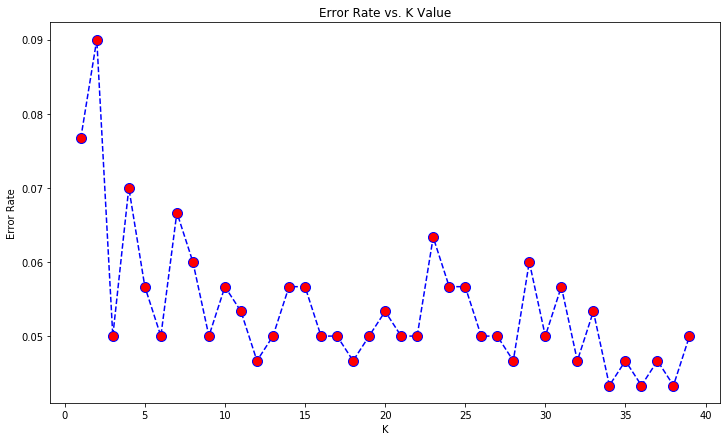

In [64]:
plt.figure(figsize=(12,7))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Here you can see that error_rate reached its least value when k=34

In [70]:
np.argmin(error_rate)

33

In [74]:
knn=KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))# better results as the k number changed to 34 or 17

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

[[153   6]
 [  7 134]]


In [1]:
import numpy as np

In [2]:
np.mean([False,False,True,False])# mean in booleans always refers to the percentage of "True" values

0.25

In [4]:
np.mean([1,2,3,4]!=[1,2,3,4])# Not equal condition is satisfied(True) in all comparisons

0.0